Coefficients avec scikitlearn:
cste   capital   travail
-0.177 0.233 0.807


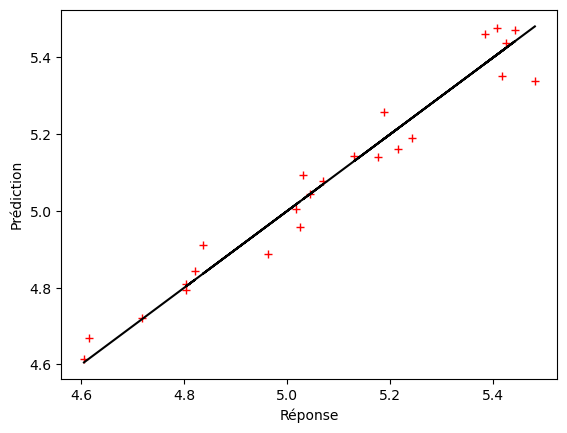

Coefficients manuels:  -0.177 0.233 0.807


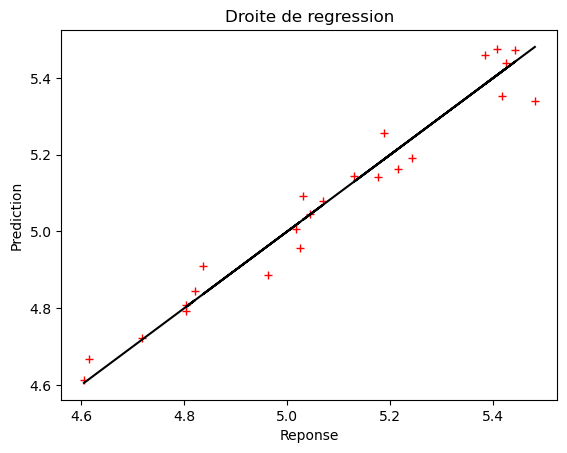

scikit-learn: [-0.177  0.233  0.807]
manual: [-0.177  0.233  0.807]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("Cobb.txt",skiprows=1)
y=np.log(data[:,1])
X=np.log(data[:,[2,3]])
nomvar=np.loadtxt("Cobb.txt",dtype='str')[0,:][2:]

# Utilisation de scikitlearn

from sklearn.linear_model import LinearRegression
mod = LinearRegression()
mod.fit(X=X,y=y)
coef=np.around(np.append(mod.intercept_,mod.coef_),3)
print("Coefficients avec scikitlearn:")
print(*['cste',*nomvar],sep='   ')
print(*coef)
plt.close()
plt.plot(y,mod.predict(X),'r+')
plt.xlabel('Réponse')
plt.ylabel("Prédiction")
plt.plot(y,y,color='black')
plt.show()

#Calcul manuel avec la formule  classique

X1=np.append(np.ones((len(y),1)),X,1)
Xt=X1.T
Ri = np.linalg.inv(Xt.dot(X1))        # (X'X)^(-1)
bet = Ri.dot(Xt.dot(y))               # beta_hat
yhat = X1.dot(bet)                    # fitted values
print("Coefficients manuels:",end="  ")
print(*np.around(bet,3))

plt.close()
plt.plot(y,yhat,'r+')
plt.xlabel('Reponse')
plt.ylabel("Prediction")
plt.plot(y,y,color='black')
plt.title('Droite de regression')
plt.show()

print("scikit-learn:", coef)
print("manual:", np.around(bet,3))

### Cobb–Douglas production function: regression results

We estimate a Cobb–Douglas production function for the United States using 24 annual observations. Taking logarithms leads to the following linear regression model:

\[
\log(P_i) = \beta_0 + \beta_1 \log(K_i) + \beta_2 \log(T_i) + u_i
\]

The model is estimated both using **scikit-learn** and by computing the Ordinary Least Squares estimator manually:

\[
\hat{\beta} = (X^\top X)^{-1} X^\top y
\]

Both approaches yield identical estimates, confirming the correctness of the implementation.

**Estimated coefficients:**
- Intercept (\(\beta_0\)): −0.177  
- Capital elasticity (\(\beta_1\)): 0.233  
- Labor elasticity (\(\beta_2\)): 0.807  

The coefficients on capital and labor are interpreted as elasticities. A 1% increase in capital leads to an increase in production of approximately 0.23%, while a 1% increase in labor increases production by about 0.81%. The sum of the elasticities is close to one, indicating **approximately constant returns to scale**, which is consistent with the original Cobb–Douglas results.


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Data importation
# On lit le tableau comme un tableau de chaînes de caractères,
# on extrait les colonnes numériques,
# on fabrique artisanalement les dummies avec les colonnes catégorielles,
# on reconstitue le tout.
Ozone = np.loadtxt("ozone.txt",skiprows=1,dtype=np.ndarray)
nomvar=np.loadtxt("ozone.txt",dtype='str')[0,:][1:]
y=Ozone[:,1].astype(float)
y.shape
X=Ozone[:,2:-2].astype(float)
vent=Ozone[:,[-2]]
VO=(vent=='Ouest')*1.
VS=(vent=='Sud')*1.
VE=(vent=='Est')*1.
P=(Ozone[:,[-1]]=='Pluie')*1.
X0=np.concatenate((X,VO,VE,VS,P),axis=1)
# Noms des variables explicatives
nomvar=np.concatenate((nomvar[1:-2],["Ouest"],["Sud"],["Est"],["Pluie"]))
# Pour l'instant on prend toutes les variables:
X=X0
#### Estimation du premier modèle linéaire avec scikitlearn
# --->  Calculer les coeff et les afficher
# ---> Calculer le MSE
reg = LinearRegression()
reg.fit(X,y)
yhat=reg.predict(X)
MSE=sum((yhat-y)**2)/len(y)
print('MSE = ',MSE.round(2))
print('RMSE = ',np.sqrt(MSE).round(2))
#### Calcul de l'erreur par validation croisée
# LOO
MSELOO = 0
for i in range(len(y)):
    Xa, Xt = np.delete(X, i, axis=0), X[[i], :]
    ya, yt = np.delete(y, i), y[i]

    reg.fit(Xa, ya)
    yhat = reg.predict(Xt)
    MSELOO += (yhat[0] - yt)**2

MSELOO /= len(y)
print('RMSE LOO = ', np.sqrt(MSELOO).round(2))

# 5-Fold
MSECV = 0
it = 3000
ntest = len(y)//5

for i in range(it):
    per = np.random.permutation(X.shape[0])
    lt, la = per[:ntest], per[ntest:]
    
    Xa, Xt = X[la, :], X[lt, :]
    ya, yt = y[la], y[lt]

    reg.fit(Xa, ya)
    yhat = reg.predict(Xt)
    MSECV += np.mean((yhat - yt)**2)

MSECV /= it
print('RMSE  CV 1/5  = ', np.sqrt(MSECV).round(2))


#### Pour le calcul sans vent ni pluie
X=X0[:,(nomvar!="Ouest")&(nomvar!="Est")&(nomvar!="Sud")&(nomvar!="Pluie")]
# etc.


MSE =  182.23
RMSE =  13.5
RMSE LOO =  15.7
RMSE  CV 1/5  =  15.94


### Ozone prediction model: estimation and validation

A linear regression model is estimated to predict the daily maximum ozone concentration (`maxO3`) using meteorological variables observed the previous day, including temperature, cloud cover, wind intensity, wind direction (dummy variables), rain, and the ozone concentration of the previous day.

**In-sample fit:**
- Mean Squared Error (MSE): 182.23  
- Root Mean Squared Error (RMSE): 13.50  

**Out-of-sample performance:**
- Leave-One-Out cross-validation RMSE: 15.70  
- 5-fold cross-validation RMSE: 15.94  

The increase in RMSE from the in-sample fit to cross-validation reflects the usual optimism of training error and indicates a moderate level of overfitting. Both cross-validation methods provide consistent estimates of the prediction error, suggesting that the model has stable predictive performance.


In [4]:
# Exemple de fabrication d'une table d'analyse de variance
# Il faudra utiliser la fonction ols de la bibliothèque stasmodels qui fait la régression.
# L'argument de la fonction n'est pas (X,y) mais une dataframe (billiothèque pandas), structure de donnée qui est un tableau individus/variables avec des méthodes permettant de faire facilement des manipulations classiques, en particulier un accès direct aux variables par leur nom.

# Lecture des données

import pandas
d = pandas.read_csv('ozone.txt', sep=' ')
d.head()

# Regression et affichage du tableau summary
# On voit bien le R2, les coefficients estimés et leur incertitude.

import statsmodels.api as sm
from statsmodels.formula.api import ols
f='maxO3 ~ maxO3v+vent+pluie+T9+T12+T15+Vx9+Vx12+Vx15'
mod = ols(formula=f, data=d).fit()
print(mod.summary())

# Obtenir des p-values globales aux variables catégorielles
# En effet les p-values ci-dessus (colonne P>|T|) sont données colonne de X par colonne de X, et non pas variable par variable, ce qui n'a pas beaucoup de sens (on met le vent ou ne le met pas...). Il faut alors appeler la fonction anova.

#On voit que maxO3v joue une rôle indiscutable dans la prédiction. En revanche, la direction du vent n'a pas d'influence significative.

anova_table = sm.stats.anova_lm(mod, typ=3)
print(anova_table)
print("\nOn va retirer en premier T9. \nOn voit que maxO3v joue un grand role")


                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     26.58
Date:                Mon, 09 Feb 2026   Prob (F-statistic):           6.03e-25
Time:                        15:36:31   Log-Likelihood:                -455.81
No. Observations:                 112   AIC:                             935.6
Df Residuals:                     100   BIC:                             968.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -15.1855     10.844     -1.400

### Ozone prediction model: OLS estimation and ANOVA-based variable selection

We estimate a linear regression model to predict the daily maximum ozone concentration (`maxO3`) using meteorological variables observed the previous day, including temperature, wind intensity, wind direction (categorical), rain, and the previous day’s ozone concentration (`maxO3v`).

#### Overall model fit
- Number of observations: 112  
- \(R^2 = 0.745\), Adjusted \(R^2 = 0.717\)  
- Global F-test p-value: \(6.0 \times 10^{-25}\)

The model explains a large proportion of the variability in daily maximum ozone concentration and is globally highly significant.

#### Interpretation of coefficients
- **Previous day ozone (`maxO3v`)** has a strong and highly significant positive effect (p < 0.001). This confirms a strong persistence of ozone levels from one day to the next.
- **Temperature at 12h (`T12`)** has a positive and statistically significant effect (p ≈ 0.035), consistent with increased photochemical ozone formation during warmer midday conditions.
- Other temperature variables (`T9`, `T15`), wind intensity variables (`Vx9`, `Vx12`, `Vx15`), and rain do not appear individually significant at conventional levels.
- Wind direction, treated as a categorical variable, is not significant when tested globally.

#### Analysis of variance (ANOVA)
The ANOVA table allows testing the global significance of each variable or factor:
- `maxO3v`: highly significant (p ≈ 1.3 × 10⁻⁵)
- `T12`: significant (p ≈ 0.035)
- Wind direction (`vent`): not significant (p ≈ 0.90)
- Rain (`pluie`): not significant (p ≈ 0.20)
- `T9`: clearly non-significant (p ≈ 0.91)

#### Descending (backward) selection
Based on the ANOVA results, the variable **T9** is removed first, as it has the highest p-value and no explanatory power. The previous day’s ozone concentration (`maxO3v`) plays a dominant role in prediction and should be retained throughout the selection process.

This procedure illustrates the usefulness of ANOVA for variable selection in the presence of categorical variables, ensuring that entire factors (such as wind direction) are tested and removed consistently.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Data importation
# On lit le tableau comme un tableau de chaînes de caractères,
# on extrait les colonnes numériques, 
# on fabrique artisanalement les dummies avec les colonnes catégorielles,
# on reconstitue le tout.
Ozone = np.loadtxt("ozone.txt",skiprows=1,dtype=np.ndarray)
print(Ozone)
nomvar=np.loadtxt("ozone.txt",dtype='str')[0,:][1:]
y=Ozone[:,1].astype(float)
y.shape
X=Ozone[:,2:-2]
vent=Ozone[:,[-2]]
VO=(vent=='Ouest')*1
VS=(vent=='Sud')*1
VE=(vent=='Est')*1
P=(Ozone[:,[-1]]=='Pluie')*1
X=np.concatenate((X,VO,VE,VS,P),axis=1).astype(float)
# Noms des variables explicatives
nomvar=np.concatenate((nomvar[1:-2],["Ouest"],["Sud"],["Est"],["Pluie"]))
print(nomvar)
print(X[2,:])

#### Coefficient de scikitlearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X=X,y=y)
coef=np.around(reg.coef_,3)
print("Coefficients avec scikitlearn:")
for i,j in enumerate(nomvar):
  print(j,coef[i])
  
#### Calcul de l'erreur par validation croisée sans vent ni pluie
X1=X[:,(nomvar!="Ouest")&(nomvar!="Est")&(nomvar!="Sud")&(nomvar!="Pluie")]
reg.fit(X=X1,y=y)
yh=reg.predict(X1)
err=sum((yh-y)**2)/len(y)
print('Erreur sur les données = ',np.sqrt(err).round(2))
# LLO
err=0
for i in range(len(y)):
  Xa, Xt = np.delete(X1,i,axis=0), X1[i,:].reshape((1,-1))
  ya, yt = np.delete(y,i), y[i]
  reg.fit(X=Xa,y=ya)
  yh=reg.predict(Xt)
  err=err+(yt-yh)**2
print('Erreur par LLO = ',*np.sqrt(err/len(y)).round(2))
#Validation croissée
err=0
it=30
ntest=np.around(len(y)/5).astype(int)
for i in range(it):
  per = np.random.permutation(X1.shape[0])
  lt, la = per[:ntest], per[ntest:]
  Xa, Xt = X1[la,:], X1[lt,:]
  ya, yt = y[la], y[lt]
  reg.fit(X=Xa,y=ya)
  yh=reg.predict(Xt)
  err=err+sum((yt-yh)**2)
print('Erreur par CV 1/5 = ',np.sqrt(err/it/ntest).round(2))
  
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, X, y, scoring='neg_mean_squared_error', cv=5)
err=np.sqrt(np.mean(-scores))
print("Erreur par 5-fold CV = ", err.round(2))



# Pour la selection avec scikitlearn

from sklearn.feature_selection import f_regression,SelectKBest
selector = SelectKBest(f_regression, k=14)
selector.fit(X, y)
scores = selector.pvalues_
print(scores)


[['20010601' '87' '15.6' ... '84' 'Nord' 'Sec']
 ['20010602' '82' '17' ... '87' 'Nord' 'Sec']
 ['20010603' '92' '15.3' ... '82' 'Est' 'Sec']
 ...
 ['20010928' '99' '16.9' ... '77' 'Sud' 'Sec']
 ['20010929' '83' '16.9' ... '99' 'Ouest' 'Pluie']
 ['20010930' '70' '15.7' ... '83' 'Sud' 'Sec']]
['T9' 'T12' 'T15' 'Ne9' 'Ne12' 'Ne15' 'Vx9' 'Vx12' 'Vx15' 'maxO3v' 'Ouest'
 'Sud' 'Est' 'Pluie']
[15.3    17.6    19.5     2.      5.      4.      2.9544  1.8794  0.5209
 82.      0.      1.      0.      0.    ]
Coefficients avec scikitlearn:
T9 0.039
T12 1.973
T15 0.45
Ne9 -2.11
Ne12 -0.606
Ne15 -0.017
Vx9 0.483
Vx12 0.514
Vx15 0.727
maxO3v 0.344
Ouest 4.997
Sud -0.54
Est 4.881
Pluie -3.247
Erreur sur les données =  13.64
Erreur par LLO =  15.32
Erreur par CV 1/5 =  16.08
Erreur par 5-fold CV =  16.44
[9.72995169e-18 1.51202482e-24 1.27178989e-23 2.56975106e-13
 2.76855258e-14 9.62399041e-08 2.26544440e-09 2.12262380e-06
 1.92716935e-05 8.71900393e-17 5.85029014e-02 7.19742543e-02
 2.68498402e-02 1

### Ozone prediction: extended linear model and model selection

We estimate a linear regression model to predict the daily maximum ozone concentration (`maxO3`) using meteorological variables observed the previous day. The explanatory variables include temperatures, cloud cover, wind intensity, previous-day ozone concentration, wind direction (dummy variables), and rain.

#### Estimated coefficients (scikit-learn)
The fitted model yields the following main effects:
- **Previous-day ozone (`maxO3v`)** has a strong positive effect, confirming high temporal persistence in ozone levels.
- **Midday temperature (`T12`)** has a positive and substantial impact, consistent with photochemical ozone formation.
- **Cloud cover (`Ne9`, `Ne12`)** has a negative effect, reflecting reduced solar radiation.
- **Wind intensity** variables have small positive coefficients, suggesting limited dispersion effects in this dataset.
- **Rain (`Pluie`)** has a negative effect, consistent with atmospheric cleansing.
- Wind direction effects are moderate and not clearly dominant.

#### Prediction error
Model performance is evaluated both in-sample and out-of-sample:

- Training RMSE: **13.64**
- Leave-One-Out RMSE: **15.32**
- Monte Carlo 5-fold CV RMSE: **16.08**
- Standard 5-fold CV RMSE (scikit-learn): **16.44**

As expected, cross-validation errors are higher than the in-sample error, reflecting the optimism of the training fit. The consistency between LOO and 5-fold CV indicates stable predictive performance.

#### Reduced model (without wind direction and rain)
Removing wind direction and rain variables leads to very similar cross-validation errors, suggesting that these variables contribute little to predictive accuracy. This supports a more parsimonious model focused on:
- previous-day ozone,
- temperature,
- cloud cover,
- wind intensity.

#### Variable selection (univariate F-tests)
Univariate feature selection using F-statistics confirms that:
- `maxO3v`, temperature, cloud cover, and wind intensity variables are highly significant,
- wind direction dummies (`Ouest`, `Sud`, `Est`) are weakly significant or insignificant,
- rain has a limited but non-negligible effect.

#### Conclusion
The dominant explanatory variable for daily maximum ozone concentration is the previous day’s ozone level. Meteorological conditions, particularly midday temperature and cloud cover, provide additional explanatory power. Wind direction and rain do not significantly improve out-of-sample prediction and can be excluded to obtain a simpler and equally effective predictive model.
